In [17]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/restaurant_economic_data.csv')
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes,categories,hours,geometry,FIPS5,labor_force,employed,unemployed,unemployment_rate,gdp
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN,POINT (-119.7111968 34.4266787),6083.0,220025.0,211137.0,8888.0,4.0,3.199681e+07
1,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN,POINT (-119.7111968 34.4266787),6083.0,220025.0,211137.0,8888.0,4.0,1.164610e+02
2,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN,POINT (-119.7111968 34.4266787),6083.0,220025.0,211137.0,8888.0,4.0,3.851246e+07
3,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",POINT (-90.335695 38.551126),29189.0,518804.0,502910.0,15894.0,3.1,9.184719e+07
4,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",POINT (-90.335695 38.551126),29189.0,518804.0,502910.0,15894.0,3.1,1.156970e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439591,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,"{'BusinessParking': ""{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",POINT (-89.9505584 38.7823508),17119.0,134203.0,128629.0,5574.0,4.2,1.006750e+02
439592,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,"{'BusinessParking': ""{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ...",POINT (-89.9505584 38.7823508),17119.0,134203.0,128629.0,5574.0,4.2,1.457245e+07
439593,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,33572,27.771002,-82.394910,4.5,9,...,"{'WheelchairAccessible': 'True', 'BusinessAcce...","Beauty & Spas, Permanent Makeup, Piercing, Tattoo","{'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...",POINT (-82.3949096 27.771002),12057.0,801413.0,777140.0,24273.0,3.0,1.157729e+08
439594,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,33572,27.771002,-82.394910,4.5,9,...,"{'WheelchairAccessible': 'True', 'BusinessAcce...","Beauty & Spas, Permanent Makeup, Piercing, Tattoo","{'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19...",POINT (-82.3949096 27.771002),12057.0,801413.0,777140.0,24273.0,3.0,1.322690e+02


In [18]:
# 1. Display basic information about the dataset
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing values per column:\n", df.isnull().sum())
print("Data types:\n", df.dtypes)

Dataset shape: (439596, 21)
Columns: ['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours', 'geometry', 'FIPS5', 'labor_force', 'employed', 'unemployed', 'unemployment_rate', 'gdp']
Missing values per column:
 business_id              0
name                     0
address              15249
city                     0
state                    0
postal_code            181
latitude                 0
longitude                0
stars                    0
review_count             0
is_open                  0
attributes           39994
categories             307
hours                67491
geometry                 0
FIPS5                 5721
labor_force           5721
employed              5721
unemployed            5721
unemployment_rate     5721
gdp                   5721
dtype: int64
Data types:
 business_id           object
name                  object
address               object


In [19]:
# 2. Summary statistics for covariates
COVARS = ['labor_force', 'employed', 'unemployed', 'unemployment_rate', 'gdp']
print("\nSummary statistics for covariates:")
df[COVARS].describe()


Summary statistics for covariates:


,labor_force,employed,unemployed,unemployment_rate,gdp
count,433875.000000,433875.000000,433875.000000,433875.000000,4.338750e+05
mean,424887.692439,410219.254237,14668.438202,3.476155,4.572722e+07
std,215210.341653,207515.875385,8253.885210,0.629904,4.596713e+07
min,1306.000000,1241.000000,65.000000,2.200000,6.589600e+01
25%,264836.000000,253239.000000,8888.000000,3.000000,1.239910e+02
50%,410190.000000,399310.000000,12895.000000,3.400000,3.262478e+07
75%,507381.000000,493316.000000,17820.000000,4.100000,8.752909e+07
max,801413.000000,777140.000000,33732.000000,7.900000,1.414246e+08


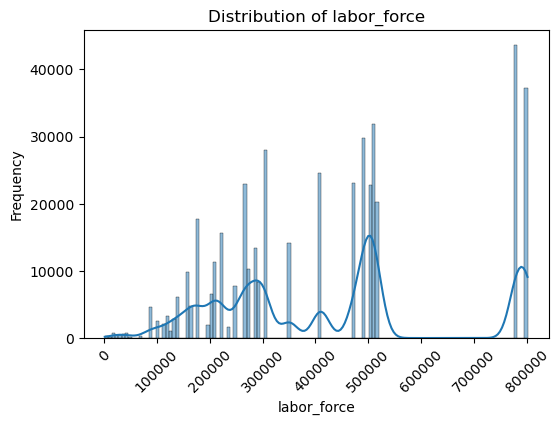

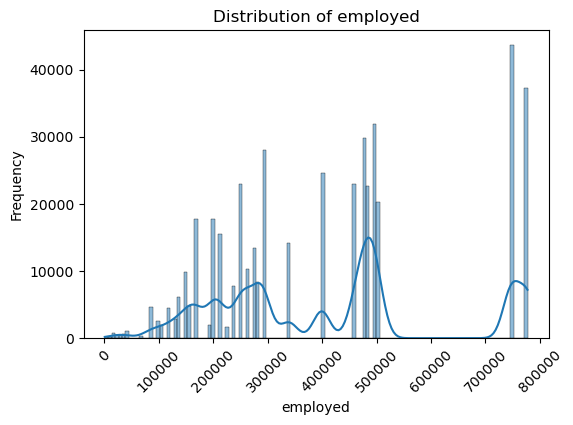

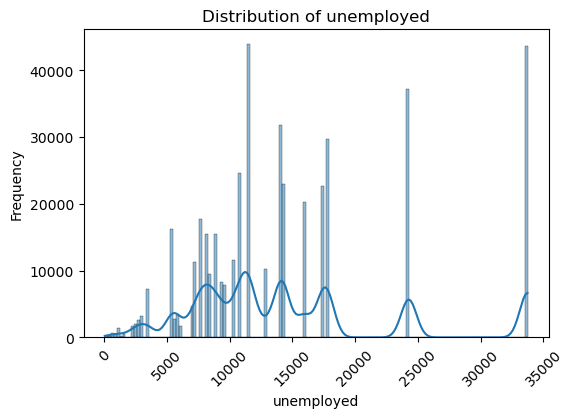

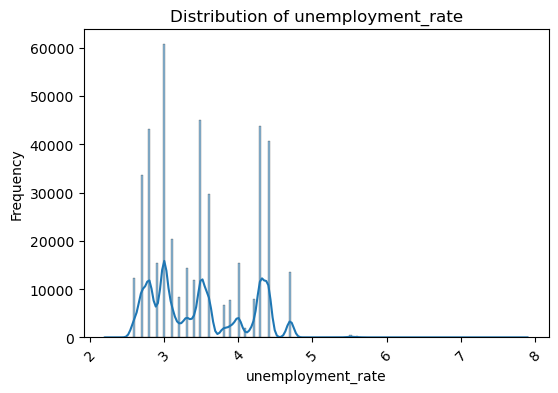

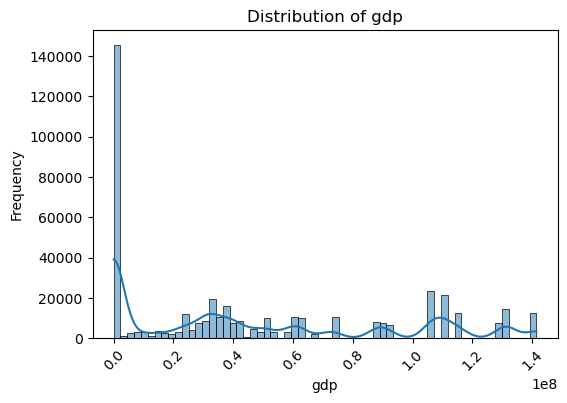

In [20]:
# 2.1 Visualize distributions of covariates
for covar in COVARS:
    plt.figure(figsize=(6,4))
    # Rotate x-ticks for better readability
    sns.histplot(df[covar].dropna(), kde=True)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {covar}')
    plt.xlabel(covar)
    plt.ylabel('Frequency')
    plt.show()

In [21]:
# 3. Summary statistics for target variable
TARGETS = ['is_open', 'review_count', 'stars']
print("\nSummary statistics for target variables:")
df[TARGETS].describe()


Summary statistics for target variables:


,is_open,review_count,stars
count,439596.000000,439596.000000,439596.000000
mean,0.796554,45.508449,3.600417
std,0.402562,122.479222,0.976057
min,0.000000,5.000000,1.000000
25%,1.000000,8.000000,3.000000
50%,1.000000,15.000000,3.500000
75%,1.000000,38.000000,4.500000
max,1.000000,7568.000000,5.000000


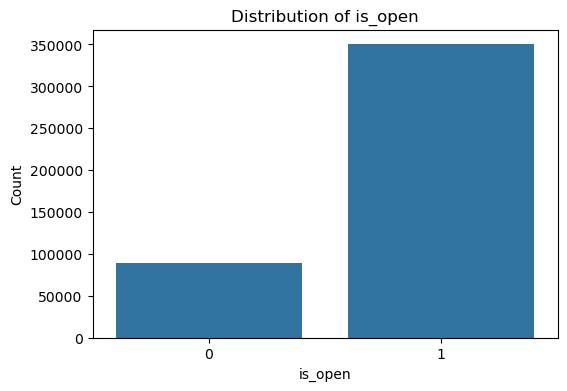

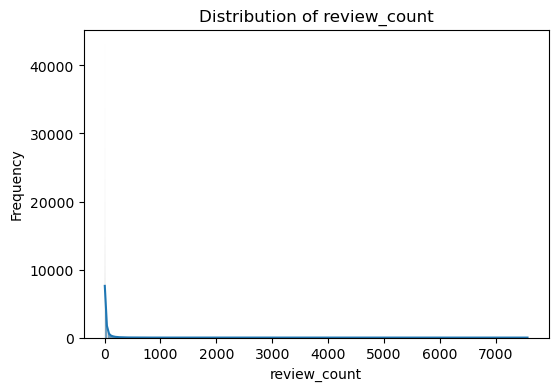

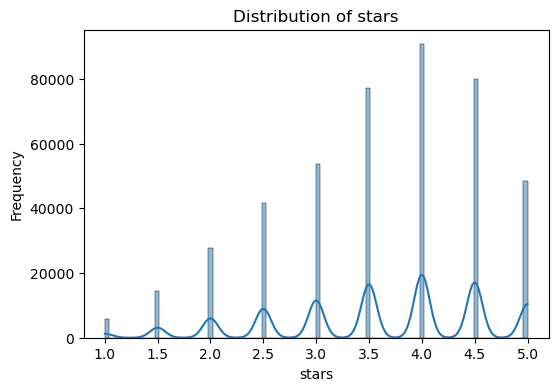

In [22]:
# 3.1 Visualize distribution of target variable
for target in TARGETS:
    if target == 'is_open':
        plt.figure(figsize=(6,4))
        sns.countplot(x=df[target])
        plt.title(f'Distribution of {target}')
        plt.xlabel(target)
        plt.ylabel('Count')
    else:
        plt.figure(figsize=(6,4))
        sns.histplot(df[target].dropna(), kde=True)
        plt.title(f'Distribution of {target}')
        plt.xlabel(target)
        plt.ylabel('Frequency')
    plt.show()

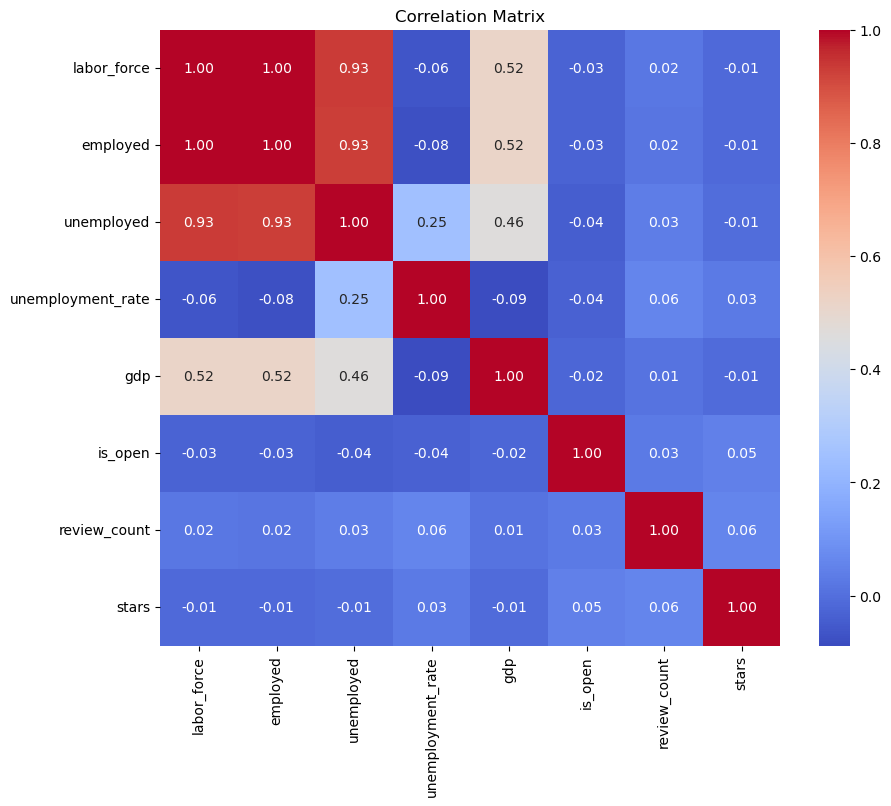

In [23]:
# 4. Correlation analysis
correlation_matrix = df[COVARS + TARGETS].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

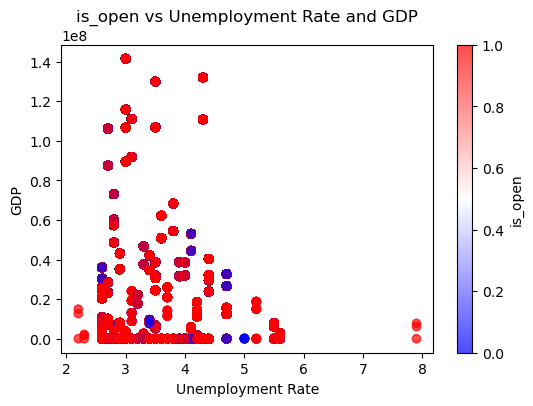

In [ ]:
# 5. Scatter plots to visualize relationships
plt.figure(figsize=(6,4))
plt.scatter(df['unemployment_rate'], df['gdp'], c=df['is_open'], cmap='bwr', alpha=0.7)
plt.colorbar(label='is_open')
plt.xlabel('Unemployment Rate')
plt.ylabel('GDP')
plt.title('is_open vs Unemployment Rate and GDP')
plt.show()